[[2.70423831 1.29862204]
 [1.71102693 0.76631765]
 [0.60043147 4.53703443]
 [0.70993435 3.70954839]
 [2.41167646 0.99274644]
 [1.11596881 3.84291422]
 [0.98999763 4.24763217]
 [2.63215013 1.3418181 ]
 [0.86007203 4.2130965 ]
 [1.81424462 0.69079873]
 [0.87189643 4.35069202]
 [1.94451297 0.82584991]
 [1.03875257 4.59677904]
 [0.70408057 4.31937095]
 [1.97486651 1.13840058]
 [2.77021095 1.18100751]
 [2.3932583  0.57368421]
 [0.77453194 4.19592138]
 [1.6604953  0.75918828]
 [1.8242927  1.05943842]
 [1.02275431 4.41723608]
 [0.88280432 4.32063693]
 [1.83339862 1.36056804]
 [0.62672513 4.57403527]
 [2.21225052 0.84619976]
 [0.94530442 4.42696688]
 [1.83184107 0.6497321 ]
 [0.97942008 4.83954848]
 [1.10942905 4.40388963]
 [2.14473897 1.29557943]
 [2.16819518 0.56784342]
 [0.99622525 4.3945289 ]
 [1.72395252 0.91331318]
 [2.17406954 0.56974521]
 [1.92472146 1.45244278]
 [1.32990395 4.24980988]
 [1.85296772 0.90721283]
 [2.03479504 1.41166648]
 [1.31809028 3.93333958]
 [1.60789024 1.02948117]


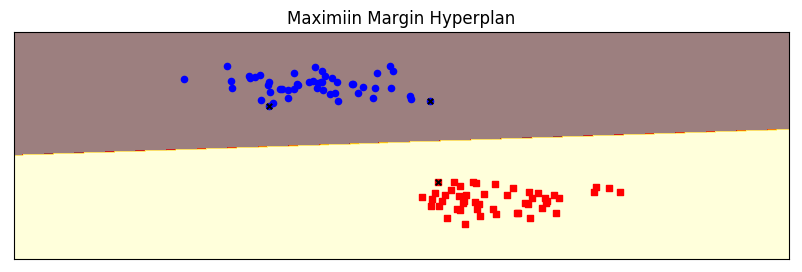

In [5]:
import numpy as np
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label], s=20)
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='black', marker='x', s=15)

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.3)
print X,y
print type(X)
print type(y)

clf = svm.SVC(C = 1.0, kernel='linear')
clf.fit(X,y)

print(clf.score(X,y))
plt.figure(figsize=(10,3), dpi=100)
plot_hyperplane(clf, X, y, h=0.01, title='Maximiin Margin Hyperplan')


/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


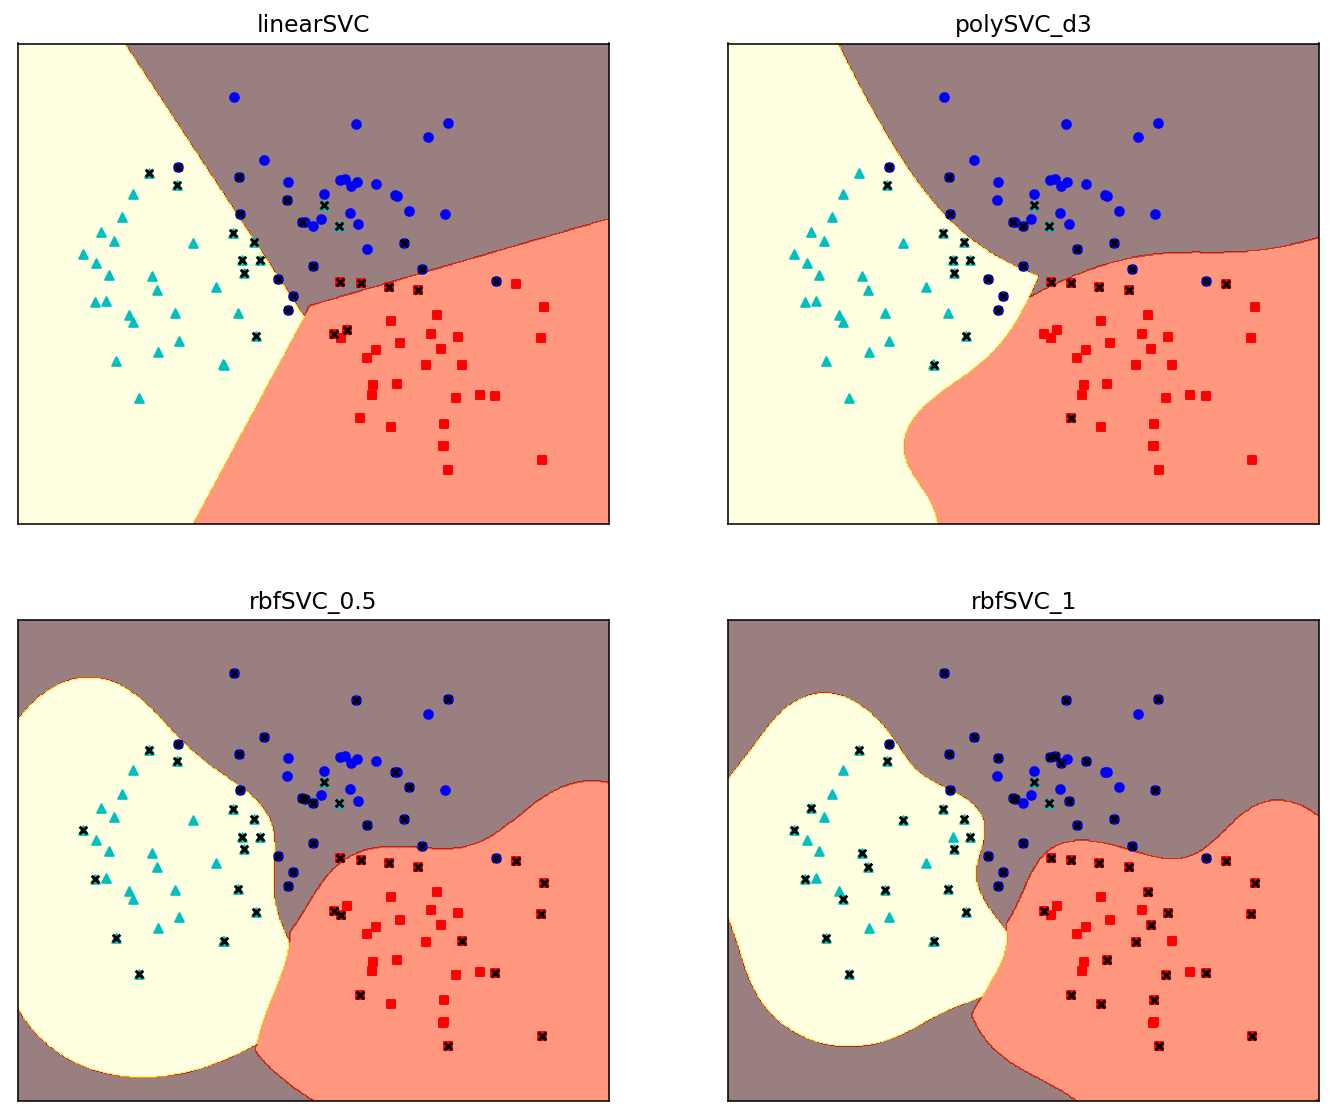

In [6]:
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=1)

clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf1 = svm.SVC(C=1.0, kernel='rbf', gamma=1)

plt.figure(figsize=(12,10),dpi=140)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf1]
titles = ['linearSVC','polySVC_d3','rbfSVC_0.5','rbfSVC_1']

for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plot_hyperplane(clf, X, y, title=titles[i])
